In [23]:
import sys
import numpy
!pip install numpy==1.26.1

!{sys.executable} -m pip install -r /home/amaya/lava-dnf/tutorials/Hackthon_SM/DNF-20231107T165842Z-001/DNF/requirements.txt

ERROR: Ignored the following versions that require a different python version: 1.25.0 Requires-Python >=3.9; 1.25.0rc1 Requires-Python >=3.9; 1.25.1 Requires-Python >=3.9; 1.25.2 Requires-Python >=3.9; 1.26.0 Requires-Python <3.13,>=3.9; 1.26.0b1 Requires-Python <3.13,>=3.9; 1.26.0rc1 Requires-Python <3.13,>=3.9; 1.26.1 Requires-Python <3.13,>=3.9
ERROR: Could not find a version that satisfies the requirement numpy==1.26.1 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 

In [22]:
import numpy as np
import tonic 
from dv import AedatFile
import skimage.measure
from lava.proc.lif.process import LIF, LIFReset
from lava.proc.monitor.process import Monitor
from lava.proc.dense.process import Dense
from lava.proc.io.sink import RingBuffer
from lava.magma.core.run_configs import Loihi2SimCfg
from lava.magma.core.run_conditions import RunSteps
from lava.lib.dnf.connect.connect import connect
from lava.lib.dnf.operations.operations import Weights, Convolution
from lava.lib.dnf.kernels.kernels import Kernel
#from utils import plot_out
import input
from input.input_process import InputReader
#from input.input_pressoc import InputReader
#from input_reader import InputReader
from lava.proc.conv.process import Conv
from lava.lib.dnf.connect.connect import connect
from lava.lib.dnf.operations.operations import Weights, Convolution
from lava.lib.dnf.kernels.kernels import Kernel, SelectiveKernel, MultiPeakKernel
from lava.proc.monitor.process import Monitor
from numpy.lib import recfunctions as rfn

ModuleNotFoundError: No module named 'input'

The total time of the recording is 5669730 us


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


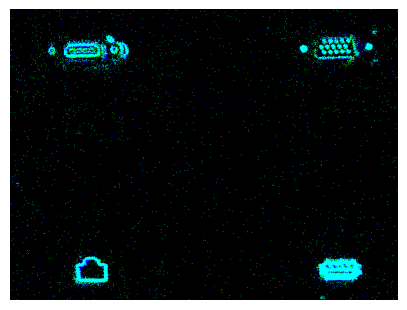

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The downsampled shape of the event data is (56, 80, 80)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

In [17]:
# Loading the file using the dv library

path='/home/amaya/lava-dnf/tutorials/Hackthon_SM/DNF-20231107T165842Z-001/DNF/data/2.aedat4'

with AedatFile(path) as f:
        events = np.hstack([packet for packet in f['events'].numpy()])

x = events['x']
y = events['y']
p = events['polarity']
t = events['timestamp']

data_time = t[-1]-t[0]
print("The total time of the recording is {} us".format(data_time))

# Stacking the data as a structured array to convert them to a 10ms frame using tonic library

data = np.stack((x,y,t,p))
data = np.array(data)
data = np.transpose(data)
dt = np.dtype([("x","int"),("y","int"),("t","int"),("p","int")])
data = np.lib.recfunctions.unstructured_to_structured(data, dt)

transform = tonic.transforms.ToFrame(
    sensor_size=(640,480,2),
    time_window=100000,
)

frames = transform(data)

# Plotting the event data
animation = tonic.utils.plot_animation(frames=frames)

event_bin = np.logical_or(frames[:,0,:,:],frames[:,1,:,:])
max_pool_data = skimage.measure.block_reduce(event_bin, (1,3,4), np.mean)
max_pool_data = skimage.measure.block_reduce(max_pool_data, (1,2,2), np.max)
print("The downsampled shape of the event data is {}".format(max_pool_data.shape))

from IPython.display import HTML
HTML(animation.to_jshtml())


In [18]:
downsample_scale = (6,8)
original_size = (480,640)
downsampled_size = (original_size[0]//downsample_scale[0], original_size[1]//downsample_scale[1])
shape = (downsampled_size[0],downsampled_size[1])
flat_shape = (downsampled_size[0]*downsampled_size[1],)
time_steps = 200
num_neurons = downsampled_size[0]*downsampled_size[1]

In [19]:
#Selector

# Initializing the network layers

input_event = InputReader(shape=flat_shape, num_steps=time_steps)
dnf_dense = Dense(weights=np.eye(num_neurons) * 40)
lif = LIF(shape=shape,du=1000, dv=2000, vth=50)
kernel = SelectiveKernel(amp_exc=6, width_exc=[6,6], global_inh=-3)
py_receiver = RingBuffer(shape=shape, buffer=time_steps)

# Connecting the Network layers

input_event.flat_out.connect(dnf_dense.s_in)
dnf_dense.a_out.reshape(new_shape=shape).connect(lif.a_in)
connect(lif.s_out, lif.a_in, [Convolution(kernel)])
lif.s_out.connect(py_receiver.a_in)




TypeError: __init__() got an unexpected keyword argument 'shape'

In [20]:
#Visualize

dnf = py_receiver.data.get().transpose()
input_event.stop()
ani = plot_out(dnf, "dnf_sockets")
from IPython.display import HTML
HTML(ani.to_jshtml())

NameError: name 'py_receiver' is not defined

In [ ]:
#Memory

# Initializing the network layers

input_event = InputReader(shape=flat_shape, num_steps=time_steps)
dnf_dense = Dense(weights=np.eye(num_neurons) * 40)
lif = LIF(shape=shape,du=1000, dv=2000, vth=50)
kernel = MultiPeakKernel
py_receiver = RingBuffer(shape=shape, buffer=time_steps)

# Connecting the Network layers

input_event.flat_out.connect(dnf_dense.s_in)
dnf_dense.a_out.reshape(new_shape=shape).connect(lif.a_in)
connect(lif.s_out, lif.a_in, [Convolution(kernel)])
lif.s_out.connect(py_receiver.a_in)
#